# Homework 1

## Matthew Lim - sl4500

### Due: Thurs Oct 22nd 11:59pm ET

In this homework we'll do some data exploration and perform an A/B test.


## Instructions

Replace Name and UNI in the first cell with your UNI and in the filename with your UNI.

Follow the comments below and fill in the blanks (____) to complete.

Where a text response is asked for, please enter as a comment, starting each line with #.

# Environment Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

sns.set_style('darkgrid')

%matplotlib inline

## Part 1: Data Exploration

One data science task, and a common one used for data science interviews, is to predict defaults on loans.<br>
We're going to load a subset of a common loan dataset and explore some of the features.

Here is a brief description of the features included:

- **loan_amnt**: The amount of money applied for
- **term**: The period over which the load should be repaid
- **annual_inc**: Annual income of the borrower
- **purpose**: The purpose of the loan, such as: credit_card, debt_consolidation, etc.
- **home_ownership**: The borrower's relationship with their primary residence
- **outcome**: The result of the loan

In [2]:
# 1. (1pt) Load the data from ../data/loan_data_subset.csv into the variable df using the default separator ','

df = pd.read_csv("../data/loan_data_subset.csv")

In [3]:
# 2. (1pt) Using .shape, how many rows does the dataset have?

print(f'dataframe has {df.shape[0]} rows')

dataframe has 20000 rows


In [4]:
# 3. (1pt) Display the first 3 rows of the dataset using .head()

df.head(3)

,loan_amnt,term,annual_inc,purpose,home_ownership,outcome
0,11000,60 months,59004,home_improvement,MORTGAGE,paid off
1,14000,36 months,120000,credit_card,RENT,default
2,10000,36 months,110000,small_business,MORTGAGE,default


In [5]:
# 4. (1pt) What's an example of a numeric feature included in the dataset (column label)?

# loan_amnt

In [6]:
# 5. (1pt) What's an example of a categorical feature in the dataset?

# purpose

In [7]:
# 6. (1pt) To practice indexing, 
#   display rows with labels 100 to 102 inclusive, with all columns, using .loc
#   Note that we're using row labels and not positional index, so use .loc instead of .iloc
#   We should see 3 rows printed.

df.loc[100:102,:]

,loan_amnt,term,annual_inc,purpose,home_ownership,outcome
100,4200,60 months,44500,home_improvement,OWN,default
101,18000,60 months,117000,debt_consolidation,MORTGAGE,paid off
102,4375,36 months,35000,house,RENT,default


In [8]:
# 7. (3pt) For more practice, 
#    display the top 3 rows sorted by 'annual_inc' descending, only columns ['loan_amnt','annual_inc','outcome'] 
#    We should see the 3 rows with highest annual_inc and only the three columns specified.

df.sort_values(by='annual_inc', ascending = False)[['loan_amnt', 'annual_inc', 'outcome']].head(3)

,loan_amnt,annual_inc,outcome
4096,10000,1200000,paid off
17189,30000,870000,paid off
3958,26375,825000,paid off


In [9]:
# 8. (3pt) To practice boolean indexing, 
#    find the mean annal_inc for rows with:
#        loan_amnt greater than the median loan_amnt and
#        outcome of 'paid off' and
#        home_ownership of 'MORTGATE' or 'OWN'

mean_annual_inc = df.loc[ (df.loan_amnt > df.loan_amnt.median()) &
                        (df.outcome == 'paid off') &
                        (df.home_ownership == 'MORTGAGE') | (df.home_ownership == 'OWN')]['annual_inc'].mean()

# Print the mean annual income found with precision of 2
print(f'{mean_annual_inc=:0.2f}')

mean_annual_inc=82518.14


In [49]:
# 9. (1pt) Calculate the frequencies of the different values seen in the column 'purpose' using .value_counts()
#    Store in purpose counts.

purpose_counts = df.purpose.value_counts()

print(purpose_counts)

debt_consolidation    11266
credit_card            3421
other                  1555
home_improvement       1179
small_business          683
major_purchase          572
car                     334
medical                 274
wedding                 230
moving                  212
house                   155
vacation                119
Name: purpose, dtype: int64


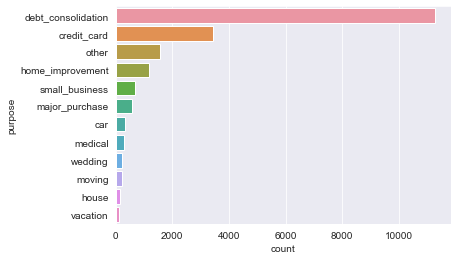

In [44]:
# 10. (2pt) Plot the frequency of each of the categories seen in 'purpose' using sns.countplot()
#   Order by bars by the index of purpose_counts calculated in the cell above, 
#      which is sorted by frequency by default. (use the order= argument in sns.countplot())
#   Because there are many values, and some of the labels are long, 
#      place 'purpose' on the y-axis instead of the x-axis (use y= instead of x=).

sns.countplot(y= df.purpose, order = purpose_counts.index);

In [12]:
# 11. (1pt) Display the summary statistics of the annual_inc column using .describe()

df.annual_inc.describe()

count    2.000000e+04
mean     6.824335e+04
std      4.420020e+04
min      2.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.200000e+04
max      1.200000e+06
Name: annual_inc, dtype: float64

In [13]:
# 12. (2pt) There appears to be a fairly large difference between mean and median.
#   Print out the absolute difference in mean annual_inc and median annual_inc to a precision of 2

annual_inc_mean = df.annual_inc.mean()
annual_inc_median = df.annual_inc.median()

print(f'absolute difference = {abs(annual_inc_mean - annual_inc_median)}')

absolute difference = 8243.349849999999


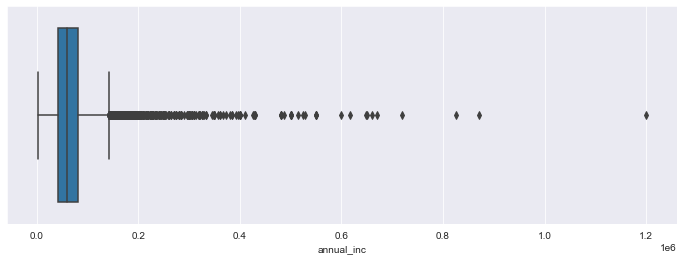

In [14]:
# 13. (2pt) Display a boxplot of annual_inc using sns.boxplot.

#  To strech the plot wider, use plt.subplots to generate 1 row with 1 column of axes with a figsize of (12,4)
fig,ax = plt.subplots(1,1, figsize = (12,4))

#  Plot a boxplot of annual_inc using ax
sns.boxplot(x=df.annual_inc, ax=ax);

In [15]:
# 14. (1pt) We'll remove some of records with the highest annual_inc, treating them as outliers.
#    What is the 95th percentile of annual_inc? (use .percentile from numpy or .quantile from pandas)
#    Eg. Where is the cutoff where we remove extremely high values but keep 95% of the data?

annual_inc_95 = np.percentile(df.annual_inc, 95)

print(f'95th percentile of annual_inc: {annual_inc_95:0.2f}')

95th percentile of annual_inc: 140000.00


,loan_amnt,term,annual_inc,purpose,home_ownership,outcome
0,11000,60 months,59004,home_improvement,MORTGAGE,paid off
1,14000,36 months,120000,credit_card,RENT,default
2,10000,36 months,110000,small_business,MORTGAGE,default
3,23350,60 months,65000,debt_consolidation,MORTGAGE,default
4,12000,60 months,49000,major_purchase,MORTGAGE,paid off
...,...,...,...,...,...,...
19994,9825,36 months,60000,debt_consolidation,OWN,default
19995,20000,60 months,87000,debt_consolidation,RENT,default
19996,3250,36 months,12000,home_improvement,RENT,paid off
19997,9000,36 months,139380,major_purchase,OWN,paid off


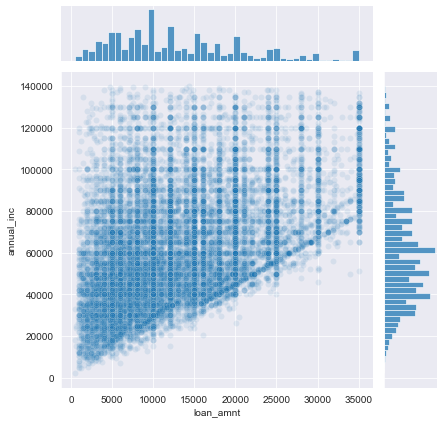

In [69]:
# 15. (3pt) Plot loan_amnt (x-axis) against annual_inc (y-axis) using sns.jointplot()
#     only including rows where annual_inc < annual_inc_95
#     set alpha=0.1 to make marks transparent.
#  Note that the histogram of annual_inc is now much less right skewed (fewer very high values).
#  We should see quite a bit of structure (places where dots overlap) in the central plot (eg. common loan amounts)

sns.jointplot(x = 'loan_amnt', y = 'annual_inc', 
              data = df[df.annual_inc < annual_inc_95], alpha = 0.1);

In [74]:
# 16. (2pt) As we saw above, 'debt_consolidation' is the most common purpose for a loan.
#    What is the mean loan_amnt where:
#    df.purpose == 'debt_consolidation' and df.annual_inc < annual_inc_95?

amnt = df[(df.purpose == 'debt_consolidation') & (df.annual_inc < annual_inc_95)].loc[:,'loan_amnt'].mean()

print(f'mean loan amount for debt consolidation for most annual incomes: {amnt:0.2f}')

mean loan amount for debt consolidation for most annual incomes: 13877.76


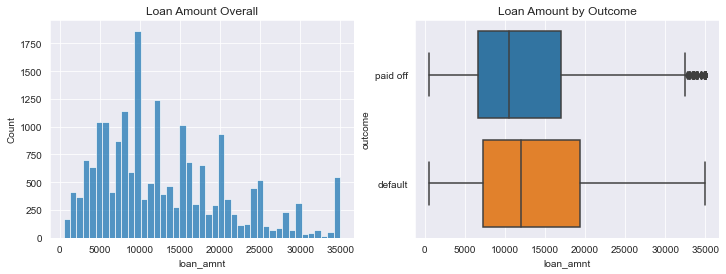

In [79]:
# 17. (5pt) One purpose of this dataset is to attempt to predict loan outcome.

# We'd like to know if loan_amnt differs at all by outcome
# Here, we'll create 2 plots, one of loan_amnt overall and another with loan_amnt by outcome.

# Create a subplot with 1 row and 2 columns with figsize of (12,4) and capture the fig and ax return as fig,ax
fig, ax = plt.subplots(1,2, figsize = (12,4))

# On the first axis (ax[0]) use sns.histplot() to plot the distribution of loan_amnt
sns.histplot(x='loan_amnt', ax=ax[0], data = df)

# Set the title on the first plot to be 'Loan Amount Overall'
ax[0].set_title("Loan Amount Overall")

# On the second axis (ax[1]) use sns.boxplot() to compare the distribution of loan_amnt by outcome
#   Place 'loan_amnt' on the x-axis and 'outcome' on the y-axis and use the full df as the dataset.
sns.boxplot(x= 'loan_amnt', y = 'outcome', ax=ax[1], data = df)

# Set the title on the second plot to be 'Loan Amount by Outcome'
ax[1].set_title("Loan Amount by Outcome");

## Part 2: Hypothesis Testing with an A/B test

Suppose we work at a large company that is developing online data science tools.

Currently the tool has interface type A but we'd like to know if using interface tool B might be more efficient.
To measure this, we'll look at length of active work on a project (aka project length).

We'll perform an A/B test where half of the projects will use interface A and half will use interface B.

In [19]:
# 18. (1pt) Read in project lengths from '../data/project_lengths_long.tsv' into df_proj using read_csv
#   Note that this is a tsv (Tab Separated File) so you'll need to use '\t' as the separator (sep='\t')

df_proj = pd.read_csv('../data/project_lengths_long.tsv', sep = '\t')

#   Display the first 3 rows using .head()
df_proj.head(3)

,Interface,Length
0,A,5.191470
1,A,3.265106
2,A,50.170632


In [20]:
# 19. (3pt) Calculate the difference in mean project length between interface A and B (mean A - mean B)

mean_length_A = df_proj[df_proj.Interface == 'A'].loc[:,'Length'].mean()
mean_length_B = df_proj[df_proj.Interface == 'B'].loc[:,'Length'].mean()

observed_mean_diff = mean_length_A - mean_length_B

# Print the result with a precision of 2
print(f'difference in mean project length between interface A and B is: {observed_mean_diff:0.2f}')

difference in mean project length between interface A and B is: 1.58


In [21]:
# 20. (5pt) We'll perform a permutation test to see how significant this result is
#    by generating 10,000 random permutation samples of mean difference

rand_mean_diffs = [] 
n_samples = 10_000
n_A = sum(df_proj.Interface == 'A') # the number of observations for Interface A

for i in range(n_samples):
    
    # Get a random permutation of df_proj.Length
    # Use pandas sample with random_state == i (the index of the loop) for grading
    # Remember: sample size should be the same as the original dataset
    #           and we should be sampling without replacement
    rand_perm = df_proj.Length.sample(frac= 1, replace= False, random_state= i)
    rand_A = rand_perm[:n_A]
    rand_B = rand_perm[n_A:]    
    
    # Take the mean of the first n_A random values
    rand_mean_A = rand_A.mean()
    
    # Take the mean of the remaining random values
    rand_mean_B = rand_B.mean()
    
    # Append the difference (rand_mean_A - rand_mean_B) to rand_mean_diffs
    rand_mean_diffs.append(rand_mean_A - rand_mean_B)
    
# Convert rand_mean_diffs into a numpy array so we can use numpy functions
rand_mean_diffs = np.array(rand_mean_diffs)
    
# check that we have the correct amount of data by asserting that the length of rand_mean_diffs == n_samples
assert len(rand_mean_diffs) == n_samples

# Display the first three values in rand_mean_diffs so we know when it's done.
rand_mean_diffs[:3]

array([-0.37392282,  1.17030641, -0.2644772 ])

In [22]:
# 21. (5pt) Before we plot the data, let's transform all values to their z-score

# Calculate the sample mean of our rand_mean_diffs using .mean()
mean_rand_mean_diffs = rand_mean_diffs.mean()

# Calculate the sample standard deviation using .std()
std_rand_mean_diffs = rand_mean_diffs.std()

# Transform rand_mean_diffs to rand_mean_diffs_zscore by subtracting the mean and dividing by the std dev
rand_mean_diffs_zscore = (rand_mean_diffs - mean_rand_mean_diffs) / std_rand_mean_diffs

# Transform the observed_mean_diff as well by subtracting the mean and dividing by the std dev
observed_mean_diff_zscore = (observed_mean_diff - mean_rand_mean_diffs) / std_rand_mean_diffs

# To check our transformation, check that the zscore mean is near 0 and std dev is near 1
assert rand_mean_diffs_zscore.mean() - 0 < .0001
assert rand_mean_diffs_zscore.std() - 1 < .0001

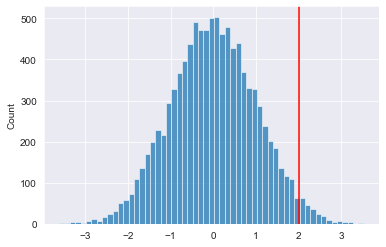

In [23]:
# 22. (2pt) Plot our observed metric against our samples.

# Use seaborn histplot to plot the distribution of rand_mean_diffs_zscore
#    capture the return in ax
ax = sns.histplot(x= rand_mean_diffs_zscore)

# Use ax.axvline to plot a red line at our observed_mean_diff_zscore
ax.axvline(observed_mean_diff_zscore, color= 'r');

In [24]:

# 23. (3pt) The plot seems to indicate a potential difference in scores. What is the p-value?
#    Calculate a two-tailed p_value
#    using np.abs(), rand_mean_diffs, observed_mean_diff and n_samples
gt = np.abs(rand_mean_diffs) >= observed_mean_diff
num_gt = sum(gt)
p_value = num_gt / n_samples

# print p_value with a precision of 3
print(f'p-value is {p_value=:0.2f}')

p-value is p_value=0.04
